# The purpose of the study was to leverage various machine learning models to predict the housing prices in London.

Statistical models implemented are as follows:- 

1. Linear Regression
2. K Nearest Neighbour (KNN)
3. Random Forest
4. Cat-Boost
5. XG-Boost
6. Gradient Boost

The goal is to find the statistical models that could be best suited for the case and leverage them to predict the housing prices

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing statistical libraries
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [2]:
df = pd.read_csv('Housing Price.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
df.info() #understanding the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum() #understanding the missing information from the df

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.describe().transpose() #basic statistical analysis

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


The total bedrooms seems to be extremely skewed since the mean bedrooms are 537 and the max number of bedrooms are 6445 indicating that it could be right skewed. We can analyze it using a histogram

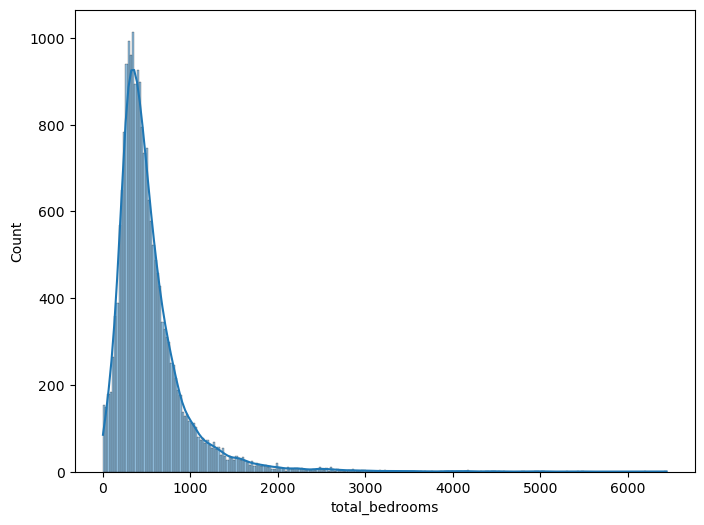

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='total_bedrooms', kde=True)
plt.show()

It's definitely skewed so we can start filling the median values in places of missing data.

In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [9]:
df['total_bedrooms'].isnull().sum()

0

We now have successfully replaced the missing values with median values for total bedrooms

# EDA

/var/folders/qq/8k633c556yb1r1jk167bnvfw0000gn/T/ipykernel_43482/736933088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


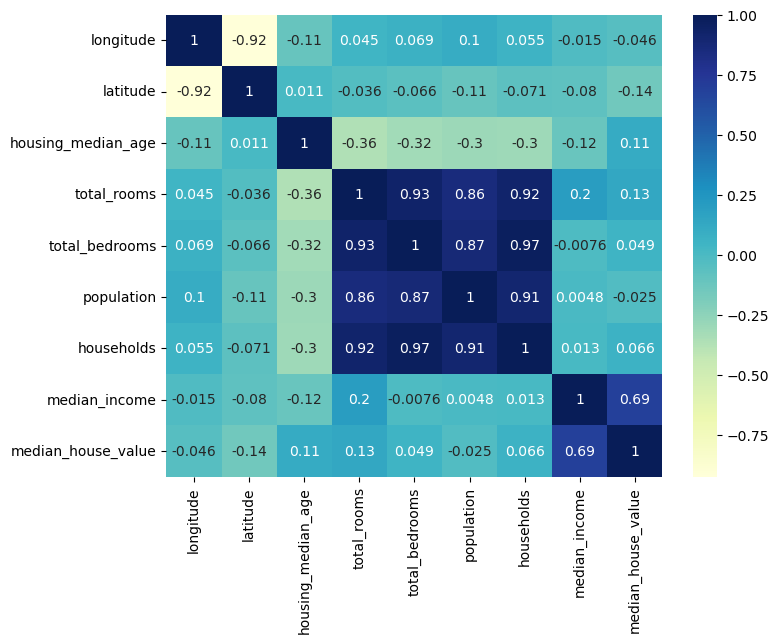

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

The above represents the correlation btw all the variables and their relationship btw the two leveraging heatmap

1. Total rooms and Total bedrooms are very highly correlated hence we will drop one of them during our analysis in order to build a more efficient model
2. Its clear that median house value is the important variable in our analysis.

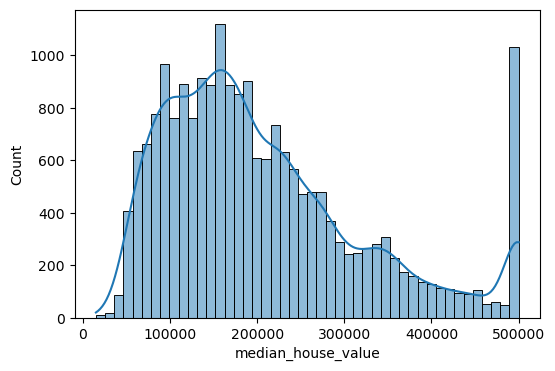

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='median_house_value', kde=True)
plt.show()

In [12]:
df['median_house_value'].skew()

0.9777632739098341

By analysing the histogram and the skew values it's clear that the median house value is skewed to the right by having extremely values on the right most end with a longer tail

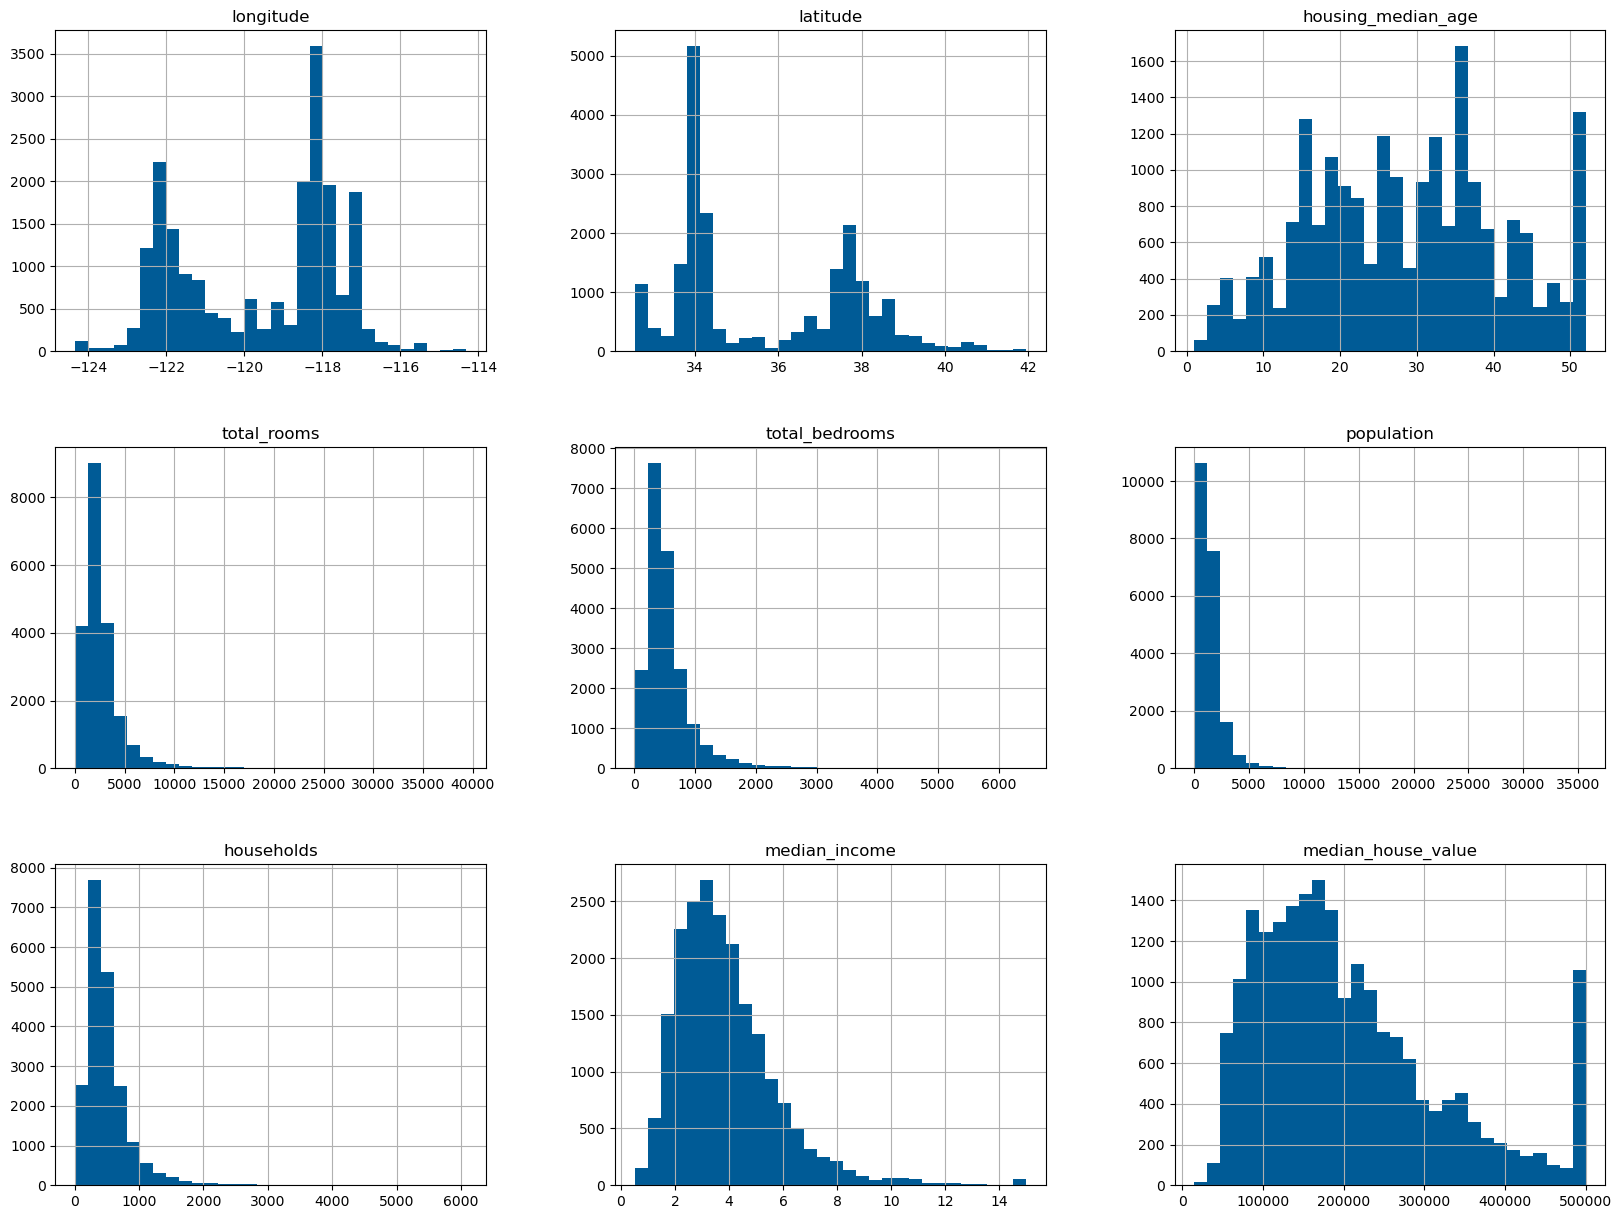

In [13]:
df.hist(bins=30, figsize=(20,15), color='#005b96')
plt.show()

Ignoring latitude and longitude data, it's clear that the df is completely skewed hence requires feature transformation

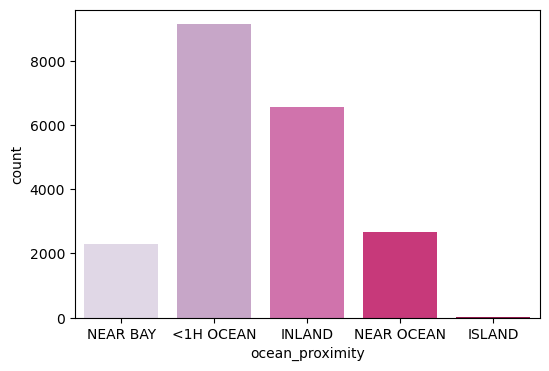

In [14]:
#Plotting the only categorical data ie ocean proximity

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ocean_proximity', palette= 'PuRd')
plt.show()

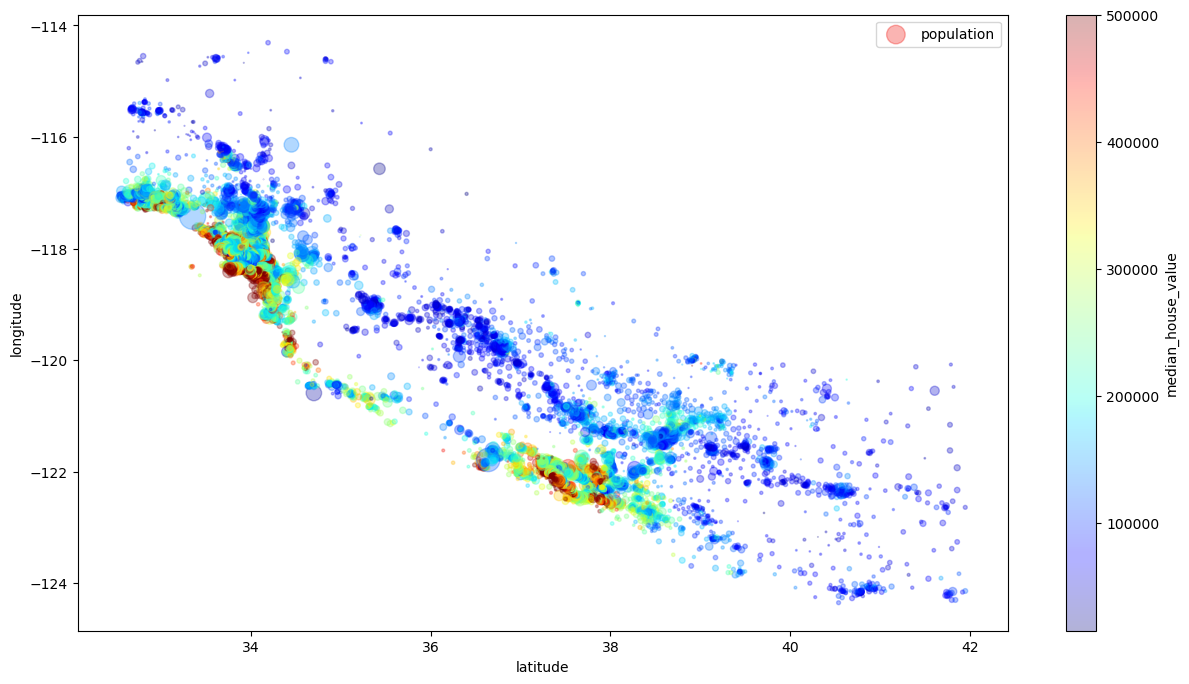

In [15]:
df.plot(kind='scatter', x='latitude', y='longitude', alpha=0.3, 
        s=df['population']/100, label='population',
        c='median_house_value', cmap=plt.get_cmap("jet"), figsize=(15,8),colorbar=True)

plt.legend()
plt.show()

# Feature Engineering

In [16]:
df['bed_per_room'] = df['total_bedrooms']/df['total_rooms']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096


In [17]:
x = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = np.log(df['median_house_value'])

# Feature Transformation

In [18]:
#Creating a df with all column names and their skew value, abs value and if they're skewed Y/N based on the abs value

skew_df = pd.DataFrame(x.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['skew'] = skew_df['Feature'].apply(lambda feature: skew(df[feature]))
skew_df['abs_skew'] = skew_df['skew'].apply(abs)
skew_df['skewed'] = skew_df['abs_skew'].apply(lambda x:True if x>0.5 else False)

In [19]:
skew_df

,Feature,skew,abs_skew,skewed
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


In [20]:
#Extrating only the columns that are skewed
skewed_columns = skew_df[skew_df['abs_skew'] > 0.5]['Feature'].values
skewed_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

In [21]:
for column in skewed_columns:
    df[column] = np.log(df[column])

# Encoding

In [22]:
#this will convert the categorical column into numbers for analysis
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity']) 

This will help decode the numerical values

df['color_decoded'] = encoder.inverse_transform(df['ocean_proximity'])

df['color_decoded'].value_counts()

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,452600.0,3,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,358500.0,3,-1.859204
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,352100.0,3,-2.043951
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,341300.0,3,-1.690331
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,342200.0,3,-1.759704


# Scaling

In [24]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [25]:
X = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_per_room
0,-1.327835,1.052548,0.982143,-1.129255,-1.634226,-1.692016,-1.561311,1.858786,2.129631,1.291089,-1.350926
1,-1.322844,1.043185,-0.607019,1.648839,1.312871,1.028461,1.440853,1.852703,1.314156,1.291089,-1.110933
2,-1.332827,1.038503,1.856182,-0.449227,-1.103136,-1.107018,-1.097678,1.567130,1.258693,1.291089,-1.838911
3,-1.337818,1.038503,1.856182,-0.636925,-0.811591,-0.947530,-0.807218,1.032566,1.165100,1.291089,-0.445506
4,-1.337818,1.038503,1.856182,-0.311482,-0.571285,-0.930649,-0.578372,0.218044,1.172900,1.291089,-0.718861


In [26]:
X.drop('ocean_proximity', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bed_per_room
0,-1.327835,1.052548,0.982143,-1.129255,-1.634226,-1.692016,-1.561311,1.858786,2.129631,-1.350926
1,-1.322844,1.043185,-0.607019,1.648839,1.312871,1.028461,1.440853,1.852703,1.314156,-1.110933
2,-1.332827,1.038503,1.856182,-0.449227,-1.103136,-1.107018,-1.097678,1.567130,1.258693,-1.838911
3,-1.337818,1.038503,1.856182,-0.636925,-0.811591,-0.947530,-0.807218,1.032566,1.165100,-0.445506
4,-1.337818,1.038503,1.856182,-0.311482,-0.571285,-0.930649,-0.578372,0.218044,1.172900,-0.718861
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.280761,-0.174260,-0.385615,-0.247885,-1.698929,-1.115804,0.330780
20636,-0.818722,1.806329,-0.845393,-1.439476,-1.427361,-1.556094,-1.697841,-0.649557,-1.124470,0.162030
20637,-0.823713,1.778237,-0.924851,0.122265,0.182203,-0.148116,0.122682,-1.516731,-0.992746,0.161389
20638,-0.873626,1.778237,-0.845393,-0.133391,-0.051560,-0.563455,-0.171521,-1.317404,-1.058608,0.246881


# Splitting data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_lr))
r2 = r2_score(y_test, prediction_lr)

print('The rmse score for Linear Regression is:', rmse)
print('The r2 score for Linear Regression is:', r2)

The rmse score for Linear Regression is: 0.3570402765758148
The r2 score for Linear Regression is: 0.6072360916797802


# KNN 

In [30]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_knn))
r2 = r2_score(y_test, prediction_knn)

print('The rmse score for KNN Algorithm is:', rmse)
print('The r2 score for KNN Algorithm is::', r2)

The rmse score for KNN Algorithm is: 0.5262403417464485
The r2 score for KNN Algorithm is:: 0.1467713521696724


# Random Forest

In [32]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
prediction_rf = rf.predict(X_test)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_rf))
r2 = r2_score(y_test, prediction_rf)

print('The rmse score for Random Forest is:', rmse)
print('The r2 score for Random Forest is:', r2)

The rmse score for Random Forest is: 0.24057476242454584
The r2 score for Random Forest is: 0.8216811381069582


# CatBoost

In [34]:
catboost = CatBoostRegressor(verbose=0)
catboost.fit(X_train, y_train)
prediction_cb = catboost.predict(X_test)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_cb))
r2 = r2_score(y_test, prediction_cb)

print('The rmse score for CatBoost is:', rmse)
print('The r2 score for CatBoost is:', r2)

The rmse score for CatBoost is: 0.22280341412699997
The r2 score for CatBoost is: 0.8470530449004947


# XGBoost

In [36]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
prediction_xg = xgboost.predict(X_test)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_xg))
r2 = r2_score(y_test, prediction_xg)

print('The rmse score for XGBoost is :', rmse)
print('The r2 score for XGBoost is:', r2)

The rmse score for XGBoost is : 0.22704579641987488
The r2 score for XGBoost is: 0.8411730910626463


# Gradient Boost

In [38]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
prediction_gbr = gbr.predict(X_test)

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_gbr))
r2 = r2_score(y_test, prediction_gbr)

print('The rmse score for Gradient Boost is:', rmse)
print('The r2 score for Gradient Boost is:', r2)

The rmse score for Gradient Boost is: 0.2697877073103233
The r2 score for Gradient Boost is: 0.7757453446733368


# Final statistical model

It's clear that out of the various prediction models, Random forest, Catboost, XGboost and Gradient boost had the least squared errors while predicting so we can combine all the 4 to build a suitable model

In [40]:
final_predictions = (0.25*prediction_rf+
                     0.25*prediction_cb+
                     0.25*prediction_xg+
                     0.25*prediction_gbr)

In [41]:
final_predictions

array([10.96148748, 11.33721387, 12.99047546, ..., 13.08498772,
       11.23032082, 12.09034507])

In [42]:
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print('The final rmse score after leveraging the required models is:', rmse)
print('The final r2 score after leveraging the required models is:', r2)

The final rmse score after leveraging the required models is: 0.22764165818602708
The final r2 score after leveraging the required models is: 0.840338342569728


In [43]:
y_test = np.exp(y_test)
final_predictions = np.exp(final_predictions)

In [44]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions})

In [45]:
results.head()

,Actual,Predicted
20046,47700.0,57612.076116
3024,45800.0,83885.987955
15663,500001.0,438219.610560
20484,218600.0,256187.868117
9814,278000.0,248815.484391


# Visualising the results

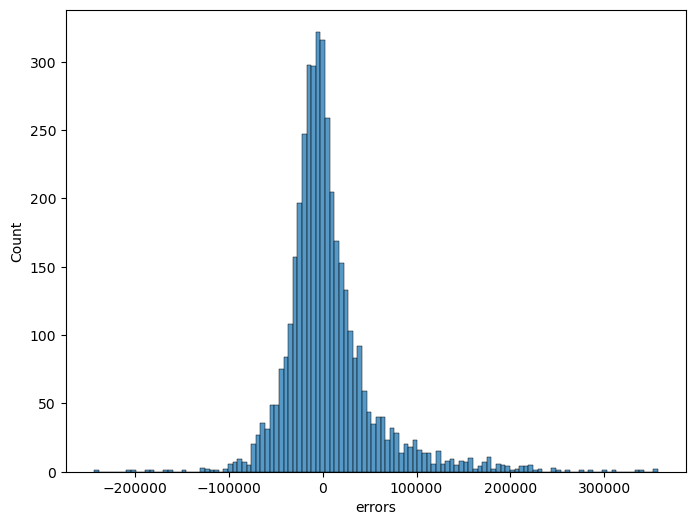

In [46]:
plt.figure(figsize=(8,6))
x1 = y_test - final_predictions
sns.histplot(x1)
plt.xlabel('errors')
plt.show()

The distribution of errors seems to be alright so we can confirm that the model is doing a decent job